# Ανάλυση δεδομένων

## Η βιβλιοθήκη ``pandas``

Η βιβλιοθήκη ``pandas`` είναι μία βιβλιοθήκη για την ανάλυση δεδομένων που μας επιτρέπει να διαβάζουμε και να επεξεργαζόμαστε εύκολα διαφόρων τύπων αρχείων και δεδομένων. Επιπροσθέτως, η απόδοσή της είναι πολύ υψηλή καθώς είναι βασισμένη πάνω στη βιβλιοθήκη ``numpy``.

In [1]:
try:
    import pandas as pd
except ImportError:
    ! pip install pandas

### Εισαγωγή: Τα αντικείμενα ``DataFrame`` και ``Series``

Με τη βιβλιοθήκη ``pandas`` μπορούμε πολύ εύκολα να διαβάσουμε διαφόρων τύπων αρχεία (π.χ. csv, xsl, κτλ) μέσα σε μία γραμμή κώδικα. Το αντικείμενο που επιστρέφεται αποτελεί τη βασική δομή της βιβλιοθήκης και ονομάζεται **DataFrame**. Το αντικείμενο αυτό δεν είναι τίποτα περισσότερο από μία 2D απεικόνιση δεδομένων, δηλαδή ένας πίνακας που αποτελείται από γραμμές και στήλες.

<div>
    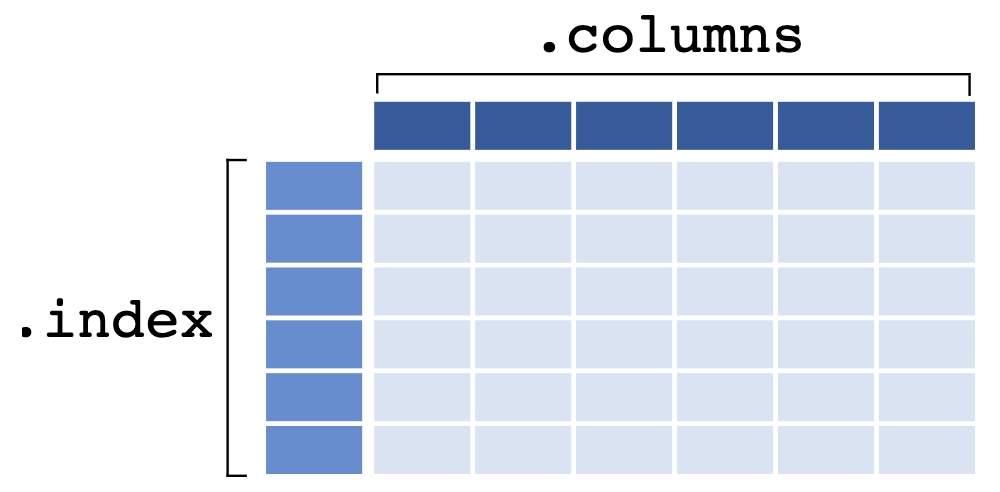
</div>

Μία τέτοια δομή δεδομένων δεν μας είναι άγνωστη. Ειδικά, αν σκεφτούμε ότι οι στήλες αναφέρονται σε κάποια ποσότητα ή μετρήσιμο μέγεθος, ενώ οι γραμμές αναφέρονται στις τιμές αυτής της ποσότητας/μεγέθους, αυτός ο συνδυασμός θυμίζει ένα ζευγάρι key-value όπως είδαμε στην περίπτωση των λεξικών.

Άρα, μπορεί κάποιος να σκεφτεί ένα DataFrame σαν ένα λεξικό που έχει τέτοια ζευγάρια κλειδιών-τιμών όπου η τιμή είναι μία λίστα που περιέχει το σύνολο των τιμών/γραμμών για το δεδομένο κλειδί.

Έχοντας ένα λεξικό μπορούμε εύκολα λοιπόν να το εκφράσουμε ως DataFrame χρησιμοποιώντας τη βασική μέθοδο της βιβλιοθήκης ``pandas.DataFrame``.

In [2]:
tutors = {
    "first_name": ["Savvas", "Elias", "Nikos"],
    "last_name": ["Chanlaridis", "Kyritsis", "Mandarakas"],
    "email": ["schanlaridis@physics.uoc.gr", "ekyritsis@physics.uoc.gr", "nmandarakas@physics.uoc.gr"],
    "office": [232, 230, 230],
    "research_field": ["Astrophysics", "Astrophysics", "Astrophysics"],
    "working hours per day": [8,8,8]
}
tutors

{'first_name': ['Savvas', 'Elias', 'Nikos'],
 'last_name': ['Chanlaridis', 'Kyritsis', 'Mandarakas'],
 'email': ['schanlaridis@physics.uoc.gr',
  'ekyritsis@physics.uoc.gr',
  'nmandarakas@physics.uoc.gr'],
 'office': [232, 230, 230],
 'research_field': ['Astrophysics', 'Astrophysics', 'Astrophysics'],
 'working hours per day': [8, 8, 8]}

In [3]:
type(tutors)

dict

In [4]:
# Access a key (column)
tutors["email"]

['schanlaridis@physics.uoc.gr',
 'ekyritsis@physics.uoc.gr',
 'nmandarakas@physics.uoc.gr']

In [5]:
df = pd.DataFrame(tutors)
df

,first_name,last_name,email,office,research_field,working hours per day
0,Savvas,Chanlaridis,schanlaridis@physics.uoc.gr,232,Astrophysics,8
1,Elias,Kyritsis,ekyritsis@physics.uoc.gr,230,Astrophysics,8
2,Nikos,Mandarakas,nmandarakas@physics.uoc.gr,230,Astrophysics,8


In [6]:
type(df)

pandas.core.frame.DataFrame

Παρατηρείστε ότι το DataFrame έχει αριστέρα του πίνακα κάτι που μοιάζει με μία στήλη χωρίς όνομα. Αυτό ονομάζεται **δείκτης (index)**. Ο δείκτης κάθε γραμμής είναι ουσιαστικά ένας ακέραιος αριθμός και αποτελεί ένα είδους "ταυτότητα" για τη συγκεκριμένη γραμμή. Είναι με άλλα λόγια το όνομα της γραμμής.

In [7]:
df.index

RangeIndex(start=0, stop=3, step=1)

Μπορούμε να έχουμε πρόσβαση στις τιμές μίας στήλης ενός DataFrame με το ίδιο συντακτικό που χρησιμοποιούμε και στα λεξικά.

In [8]:
# Access a column (key)
df["email"]

0    schanlaridis@physics.uoc.gr
1       ekyritsis@physics.uoc.gr
2     nmandarakas@physics.uoc.gr
Name: email, dtype: object

Προσέξτε ότι η στήλη που πήραμε από το DataFrame δεν είναι ακριβώς η ίδια με το αποτέλεσμα που πήραμε από το απλό λεξικό. Αυτό συμβαίνει γιατί μία στήλη από ένα DataFrame είναι ένα άλλο αντικείμενο που ονομάζεται **Series**.

Αντικείμενα τύπου Series αποτελούν μία 1D αναπαράσταση δεδομένων, παρόμοια με μία λίστα ή ένα μονοδιάστατο array. Παρ' όλα αυτά, όπως και στην περίπτωση του DataFrame σε σχέση με ένα λεξικό, ένα αντικείμενο τύπου Series συνοδεύεται από πολλές και ποικίλες δυνατότητες συγκριτικά με μία λίστα. 

Άρα μπορεί να σκεφτεί κανείς ότι ένα DataFrame είναι μία συλλογή από πολλά αντικείμενα τύπου Series.

In [9]:
type(df["email"])

pandas.core.series.Series

### Πρόσβαση σε πολλαπλές στήλες ενός DataFrame

Σε αντίθεση με τα λεξικά, σε ένα DataFrame μπορούμε να έχουμε πρόσβαση σε ένα μεμονωμένο σύνολο στηλών που μας ενδιαφέρουν δίνοντας σαν όρισμα **μία λίστα** με τα ονόματα των στηλών που θέλουμε. Αυτό που θα επιστραφεί είναι ουσιαστικά μία φιλτραρισμένη εκδοχή του αρχικού DataFrame.

In [10]:
# Notice the double brackets and the order the
# columns appear compared to original df
df[["research_field", "first_name"]]

,research_field,first_name
0,Astrophysics,Savvas
1,Astrophysics,Elias
2,Astrophysics,Nikos


### Πρόσβαση στις γραμμές ενός DataFrame

Για να έχουμε πρόσβαση στις γραμμές ενός DataFrame χρησιμοποιούμε τους δείκτες ``loc`` ή ``iloc``.

- Ο δείκτης ``loc``: αναφέρεται στη θέση της γραμμής μέσα στο DataFrame όταν αυτή έχει κάποια ετικέτα (location -> loc).

- Ο δείκτης ``iloc``: αναφέρεται στη θέση της γραμμής μέσα στο DataFrame βάσει του δείκτη (integer location -> iloc).


Χρησιμοποιώντας αυτούς τους δείκτες μπορούμε να πάρουμε τις γραμμές και από συγκεκριμένες στήλες δίνοντας σαν δεύτερο όρισμα το όνομα (στην περίπτωση του δείκτη loc) ή τον δείκτη της στήλης (στην περίπτωση του δείκτη iloc).

Γενικά ισχύει:

    df.loc[[rows_label], [columns_name]]
    
    df.iloc[[rows_indexes], [columns_indexes]]
    
Οι παραπάνω έννοιες φαίνονται πολύπλοκες αλλά είναι πιο εύκολα κατανοητές μέσω παραδειγμάτων.

#### Χρήση του ``iloc``

In [11]:
# Note: iloc/loc are indexers => use of square brackets
df.iloc[[1]]

# Access multiple rows
# df.iloc[[1,2]]

# # or...

# df.iloc[0:2]

# df.iloc[:]

,first_name,last_name,email,office,research_field,working hours per day
1,Elias,Kyritsis,ekyritsis@physics.uoc.gr,230,Astrophysics,8


In [12]:
# This will fetch the last two rows of the second column
df.iloc[1:3, 1]

# # THIS WON'T WORK WITH iloc!
# df.iloc[1:3, "last_name"]

1      Kyritsis
2    Mandarakas
Name: last_name, dtype: object

#### Χρήση του ``loc``

In [13]:
df.loc[1:3]

,first_name,last_name,email,office,research_field,working hours per day
1,Elias,Kyritsis,ekyritsis@physics.uoc.gr,230,Astrophysics,8
2,Nikos,Mandarakas,nmandarakas@physics.uoc.gr,230,Astrophysics,8


In [14]:
# Notice that we used the column name with the loc indexer
df.loc[1:3, "last_name"]

# df.loc[1:3, "last_name":"office"]

# # THIS WON'T WORK WITH loc!
# df.loc[1:3, 1]

1      Kyritsis
2    Mandarakas
Name: last_name, dtype: object

### Προσθήκη στηλών στο υπάρχων DataFrame

Μία από τις πιο σημαντικές δυνατότητες που μας δίνει η χρήση της δομής δεδομένων ενός **DataFrame** είναι ότι μπορούμε να παράξουμε νέες στήλες οι οποίες έχουν προκύψει από προηγούμενες. 

Για παράδειγμα, έχοντας την πληροφορία των ωρών εργασίας ανά ημέρα θα μπορούσαμε να υπολογίσουμε σε μία νέα στήλη τις συνολικές ώρες εργασίας ανά μήνα. 

In [15]:
df['working hours per month'] = df['working hours per day'].values*30
df

,first_name,last_name,email,office,research_field,working hours per day,working hours per month
0,Savvas,Chanlaridis,schanlaridis@physics.uoc.gr,232,Astrophysics,8,240
1,Elias,Kyritsis,ekyritsis@physics.uoc.gr,230,Astrophysics,8,240
2,Nikos,Mandarakas,nmandarakas@physics.uoc.gr,230,Astrophysics,8,240


In [16]:
print(df['working hours per day'].values)
type(df['working hours per day'].values)

[8 8 8]


numpy.ndarray

**Προσέξτε** εδώ την χρήση της μεθόδου ``values``. Ουσιαστικά με την σύνταξη ``df[column_name].values`` μετατρέπουμε όλη την στήλη σε ένα ndarray σαν αυτά που είδαμε στην numpy. 

### Μετονομασία στηλών στο υπάρχων DataFrame

Μία άλλη δυνατότητα που μας παρέχει η δομή δεδομένων **DataFrame** είναι η μετονομασία μίας ή παραπάνω στηλών της επιλογής μας στο υπάρχων data frame με την χρήση της μεθόδου ``rename``. 
Η σύνταξη της μεθόδου είναι: ``df.rename(columns={'Old name':'New name'})``. <br>
**Παρατηρήστε** ότι την στήλη ή τις στήλες που θέλουμε να μετονομάσουμε τις δίνουμε ως έαν λεξικό που σαν κλειδί έχει το παλιό όνομα της στήλης και σαν τιμή το νέο όνομα. 

Για παράδειγμα έστω ότι θέλουμε να μετονομάσουμε την στήλη που φτιάξαμε προηγουμένως,**'working hours per month'** σε **'total working hours per month'**. 

**Προσοχή**: Προκειμένου να μας προστατέψει από το να κάνουμε αλλαγές που δεν θέλουμε στο αρχικό DataFrame, το ``pandas`` σχεδόν ποτέ δεν αλλάζει το αρχικό DataFrame εκτός αν συμπεριλάβουμε την παράμετρο ``inplace=True``. Αν έχουμε την προεπιλεγμένη τιμή ``inplace=False`` τότε θα μας επιστρέψει μία "εικόνα" της αλλαγής αφήνοντας το αρχικό DataFrame ανεπηρέαστο.

In [17]:
df.rename(columns={'working hours per month':'total working hours per month'},inplace=True)
df

,first_name,last_name,email,office,research_field,working hours per day,total working hours per month
0,Savvas,Chanlaridis,schanlaridis@physics.uoc.gr,232,Astrophysics,8,240
1,Elias,Kyritsis,ekyritsis@physics.uoc.gr,230,Astrophysics,8,240
2,Nikos,Mandarakas,nmandarakas@physics.uoc.gr,230,Astrophysics,8,240


### Αλλαγή του ονόματος των γραμμών (δείκτη - index)

Μερικές φορές (ανάλογα με το σύνολο δεδομένων) συμφέρει, αντί να χρησιμοποιήσουμε έναν ακέραιο αριθμό για να ταυτοποιήσουμε και να αναφερόμαστε σε κάθε γραμμή, να χρησιμοποιήσουμε κάτι άλλο για την ταυτοποίησή της. Αυτό μπορεί να είναι μία *ετικέτα* (label) με κάποια μοναδική τιμή που θα χαρακτηρίζει τη συγκεκριμένη γραμμή.

Στο συγκεκριμένο παράδειγμα μία καλή επιλογή για μία ετικέτα θα ήταν το email καθώς είναι κάτι το μοναδικό και θα μπορούσε να μας βοηθήσει να αναφερόμαστε σε κάποια γραμμή βάσει αυτού.

In [18]:
df.set_index('email', inplace=True)
df

,first_name,last_name,office,research_field,working hours per day,total working hours per month
email,,,,,,
schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232,Astrophysics,8,240
ekyritsis@physics.uoc.gr,Elias,Kyritsis,230,Astrophysics,8,240
nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230,Astrophysics,8,240


In [19]:
df.index

Index(['schanlaridis@physics.uoc.gr', 'ekyritsis@physics.uoc.gr',
       'nmandarakas@physics.uoc.gr'],
      dtype='object', name='email')

Πλέον η στήλη με τα email δεν αποτελεί μέρος των δεδομένων αλλά χρησιμοποιείται ως ετικέτα για την κάθε γραμμή.

Τώρα μπορεί να φαίνεται πιο καθαρά η διαφορά μεταξύ των ``loc`` και ``iloc``.

In [20]:
# email serves as label and is not included in columns anymore
df.columns

# # THIS WON'T WORK SINCE email IS NOT A COLUMN!
# df["email"]

Index(['first_name', 'last_name', 'office', 'research_field',
       'working hours per day', 'total working hours per month'],
      dtype='object')

In [21]:
df.iloc[1:3, 0:2]

,first_name,last_name
email,,
ekyritsis@physics.uoc.gr,Elias,Kyritsis
nmandarakas@physics.uoc.gr,Nikos,Mandarakas


In [22]:
# Use of labels in loc
df.loc["ekyritsis@physics.uoc.gr":"nmandarakas@physics.uoc.gr", "first_name":"last_name"]

,first_name,last_name
email,,
ekyritsis@physics.uoc.gr,Elias,Kyritsis
nmandarakas@physics.uoc.gr,Nikos,Mandarakas


## Παράδειγμα 1: ``Pandas`` basics

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    
Δημιουργήστε ένα ``DataFrame`` όπως αυτό που φαίνεται παρακάτω.<br><br>

<div>
    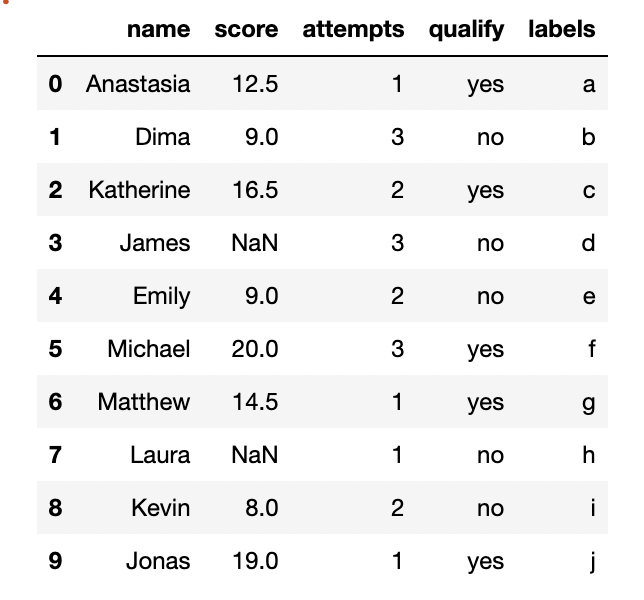
</div>

1. Από το ``DataFrame`` που δημιουργήσατε επιστρέψτε πίσω τις στήλες **"name"**,**"attempts"**.


2. Με την χρήση της μεθόδου ``iloc`` επιστρέψτε πίσω τις πρώτες 3 σειρές από το ``DataFrame``.


3. Με την χρήση της μεθόδου ``iloc`` επιστρέψτε πίσω τις πρώτες 5 σειρές και την 2η και 3η στήλη από το ``DataFrame``.


4. Με την χρήση της μεθόδου ``loc`` επιστρέψτε πίσω τις πρώτες 3 σειρές από το ``DataFrame``.


5. Με την χρήση της μεθόδου ``loc`` επιστρέψτε πίσω τις πρώτες 5 σειρές και την 2η και 3η στήλη από το ``DataFrame``.


6. Μετονομάσετε τις στήλες **"name"** και **"score"** σε **"NAME"** και **"SCORE"**, αντίστοιχα.


7. Αλλάξτε τα indexes του ``DataFrame`` χρησιμοποιώντας ως νέους δείκτες τις τιμές της στήλης **"labels"**.


8. Επιστρέψτε πίσω τις σειρές του ``DataFrame`` με indexes από a έως f και τις στήλες **"NAME"**,**"attempts"** και **"qualify"**.


9. Επαναφέρετε τα αρχικά indexes του ``DataFrame``.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για να πάρετε έτοιμο το ``DataFrame``</summary></b>
    
```python 
import numpy as np
import pandas as pd

# Create a dictionary with the data
exams_data = {
    
    "name":["Anastasia", "Dima", "Katherine", "James", "Emily", 
            "Michael", "Matthew", "Laura", "Kevin", "Jonas"],
    "score":[12.5, 9.0, 16.5, np.nan, 9.0, 20.0, 14.5, np.nan, 8.0, 19.0],
    "attempts":[1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    "qualify":["yes", "no", "yes", "no", "no", "yes", "yes", "no", "no", "yes"],
    "labels":["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
    
}

# Pass the dictionary into a DataFrame
exdf = pd.DataFrame(exams_data)
exdf
```
    
</details>

In [23]:
# You can try task # 1 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 1 </summary></b>
    
```python 
exdf[["name", "attempts"]]
```
    
</details>

In [24]:
# You can try task # 2 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 2</summary></b>
    
```python 
exdf.iloc[0:3]
```
    
</details>

In [25]:
# You can try task # 3 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 3</summary></b>
    
```python 
exdf.iloc[0:5, [1,2]]
```
    
</details>

In [26]:
# You can try task # 4 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 4</summary></b>
    
```python 
exdf.loc[0:3]
```
    
</details>

In [27]:
# You can try task # 5 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 5</summary></b>
    
```python 
exdf.loc[0:5, ["score", "attempts"]]
```
    
</details>

In [28]:
# You can try task # 6 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 6</summary></b>
    
```python 
# Notice that by default inplace=False,
# so the initial DataFrame would be left unchanged
exdf.rename(columns={"name":"NAME", "score":"SCORE"}, inplace=True)
exdf
```
    
</details>

In [29]:
# You can try task # 7 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 7</summary></b>
    
```python 
exdf.set_index("labels", inplace=True)
exdf
```
    
</details>

In [30]:
# You can try task # 8 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 8</summary></b>
    
```python 
exdf.loc["a":"f", ["NAME", "attempts", "qualify"]]
```
    
</details>

In [31]:
# You can try task # 9 here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του task 9</summary></b>
    
```python 
exdf.reset_index(inplace=True)
exdf
```
    
</details>

### Φιλτράρισμα δεδομένων

Το φιλτράρισμα των δεδομένων αποτελεί ένα πολύ βασικό βήμα στη διαδικασία της ανάλυσης δεδομένων καθώς μας επιτρέπει να διαχωρίσουμε τα δεδομένα που μας ενδιαφέρουν από εκείνα που μας είναι αχρείαστα.

Το φιλτράρισμα βασίζεται στην αρχή ότι όταν κάνουμε συγκρίσεις χρησιμοποιώντας το DataFrame, αυτό που θα πάρουμε πίσω είναι ένα **αντικείμενο Series που περιέχει λογικές τιμές**. Οι τιμές του αντικειμένου Series αντιστοιχούν στις θέσεις όπου η συνθήκη είναι αληθής/ψευδής αντίστοιχα και μπορεί να λειτουργήσει ως μάσκα για τα δεδομένα μας, ακριβώς όπως είδαμε και στην περίπτωση της βιβλιοθήκης ``numpy``. 

Για παράδειγμα, ας ξαναφέρουμε το DataFrame με το οποίο δουλεύαμε στην αρχική του μορφή και ας προσθέσουμε δύο καινούργιους tutors.

In [32]:
# Let's reset the index
df.reset_index(inplace=True)
df

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232,Astrophysics,8,240
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230,Astrophysics,8,240
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230,Astrophysics,8,240


In [33]:
new_tutors = {
    'first_name': ['John', 'Jane'], 
    'last_name': ['Doe', 'Doe'], 
    'email': ['john.doe@email.com', 'jane.doe@email.com'], 
    'research_field': ['Biology', 'Chemistry']
    }

df2 = pd.DataFrame(new_tutors)
df2
df = df.append(df2, ignore_index=True)
df

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,NaN,Biology,NaN,NaN
4,jane.doe@email.com,Jane,Doe,NaN,Chemistry,NaN,NaN


- Παρατηρούμε ότι το νέο DataFrame "προστέθηκε" στο τέλος του αρχικού.

- Η στήλη "office" που δεν υπήρχε στο δεύτερο DataFrame συμπληρώθηκε με κενές τιμές. Το κενό αναπαρίσταται ως ``NaN`` (Not a Number) και ανήκει στην κλάση float.

- Αυτό σημαίνει ότι μπορούμε να κάνουμε πράξεις μεταξύ αριθμητικών τιμών και τιμών NaN, αν και σε αυτή την περίπτωση το αποτέλεσμα θα είναι πάντα NaN.

- Κάτι τέτοιο μπορεί να δημιουργήσει πρόβλημα όταν προσπαθούμε να βρούμε στατιστικά μεγέθη (π.χ. τη μέση τιμή μιας στήλης που περιέχει κενές τιμές) καθώς θα επηρεάσουν το αποτέλεσμα. Θα δούμε στη συνέχεια πως διαχειριζόμαστε τέτοιες περιπτώσεις.

Για την ώρα ας υποθέσουμε ότι θέλουμε να εμφανίσουμε όλους τους tutors που έχουν επίθετο "Doe".

In [34]:
df["last_name"] == "Doe"

0    False
1    False
2    False
3     True
4     True
Name: last_name, dtype: bool

Ας φτιάξουμε μία μάσκα που θα κρατάει μόνο εκείνους τους tutors που έχουν επίθετο "Doe" και ας το εφαρμόσουμε στα δεδομένα μας.

In [35]:
mask = (df["last_name"] == "Doe")
df[mask]

# # The above is equivalent to:
# df[df["last_name"] == "Doe"]

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
3,john.doe@email.com,John,Doe,NaN,Biology,NaN,NaN
4,jane.doe@email.com,Jane,Doe,NaN,Chemistry,NaN,NaN


Αν θέλουμε να εμφανίσουμε μόνο μία συγκεκριμένη στήλη για όσους tutors έχουν επίθετο "Doe", τότε μπορούμε πολύ απλά να χρησιμοποιήσουμε τους δείκτες loc ή iloc μαζί με την αντίστοιχη στήλη.

Σε αυτή την περίπτωση, η μάσκα εφαρμόζεται πάνω στις γραμμές και κρατάμε αυτές που αντιστοιχούν στη ζητούμενη στήλη.

In [36]:
df.loc[mask, "research_field"]

3      Biology
4    Chemistry
Name: research_field, dtype: object

Φυσικά μπορούμε να κατασκευάσουμε και πιο σύνθετα φίλτρα χρησιμοποιώντας τους τελεστές ``&`` (and),  ``|`` (or) και ``~`` (not) όπως έχουμε δει.

In [37]:
# Filter those whom their research field is Biology or Chemistry
filt = (df["research_field"] == "Biology") | ((df["research_field"] == "Chemistry"))

# Show the rest of them
df[~filt]

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0


In [38]:
df.loc[filt, ["first_name", "office", "research_field"]]

,first_name,office,research_field
3,John,NaN,Biology
4,Jane,NaN,Chemistry


### Ανάλυση δεδομένων

Έχοντας κατανοήσει τις βασικότερες δομές δεδομένων στην βιβλιοθήκη ``pandas`` καθώς και το πως φιλτράρουμε δεδομένα, θα δούμε πως μπορούμε να διαχειριστούμε αληθινά σύνολα δεδομένων και τι εργαλεία έχουμε στη διάθεσή μας για να τα επεξεργαστούμε.

Στο συγκεκριμένο παράδειγμα, θα χρησιμοποιήσουμε ένα σύνολο δεδομένων που αφορά αξίες κατοικιών στην Καλιφόρνια των Η.Π.Α.
Τα δεδομένα προέρχονται από την ακαδημαϊκή εργασία των Pace, R. Kelley και Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

Αρχικά, θα διαβάσουμε τα δεδομένα και θα εξετάσουμε τι μορφή έχουν και κάποια βασικά χαρακτηριστικά τους. Η ανάγνωση ενός αρχείου δεδομένων γίνεται σε μία γραμμή κώδικα χρησιμοποιώντας τη βιβλιοθήκη ``pandas``.

In [39]:
import pandas as pd
data = pd.read_csv('data/california_housing.csv')
data.shape

(20640, 9)

Βλέπουμε ότι το αρχείο μας αποτελείται από 9 στήλες και 20640 γραμμές.

Η μέθοδος ``info`` μας δίνει περισσότερες πληροφορίες σχετικά με το αρχείο των δεδομένων. Εκτός του αριθμού των στηλών/γραμμών, μας δείχνει και τον τύπο των δεδομένων που έχει κάθε στήλη καθώς και το αν περιέχουν κενές τιμές.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20293 non-null  object 
 1   latitude          20303 non-null  float64
 2   housingMedianAge  20270 non-null  float64
 3   totalRooms        20331 non-null  float64
 4   totalBedrooms     20320 non-null  object 
 5   population        20288 non-null  float64
 6   households        20293 non-null  object 
 7   medianIncome      20300 non-null  float64
 8   medianHouseValue  20267 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.4+ MB


Παρατηρούμε ότι υπάρχουν κενές εγγραφές σε όλες τις στήλες του αρχείου, οπότε τα δεδομένα μας δεν είναι πλήρη. Επίσης, το γεγονός ότι ο τύπος των δεδομένων σε μερικές στήλες έχει χαρακτηριστεί από το ``pandas`` ως ``object`` σημαίνει ότι μάλλον οι συγκεκριμένες στήλες περιέχουν κάποια συμβολοσειρά που δεν επέτρεψε την μετατροπή τους σε αριθμητικές τιμές.

Δυστυχώς, αυτός είναι ο κανόνας της πραγματικότητας και τις περισσότερες φορές στα δεδομένα που έχουμε στη διάθεσή μας υπάρχουν κενά ή μη-έγκυρες τιμές.

Γι' αυτό το λόγο, είναι απαραίτητο, πριν ξεκινήσουμε να αναλύουμε τα δεδομένα μας να εκτελέσουμε ένα στάδιο προ-επεξεργασίας των δεδομένων ώστε να τα φέρουμε σε μια επιθυμητή μορφή.

Σε περίπτωση που θέλουμε να δούμε πως μοιάζει το αρχείο με τα δεδομένα μας μπορούμε να χρησιμοποιήσουμε την μέθοδο ``head``. Επιλέγοντας τον αριθμό των σειρών του DataFrame που θέλουμε να δούμε, μπορούμε να πάρουμε μία πρώτη γεύση των δεδομένων μας. 

In [41]:
#Returns the first 10 rows of our DataFrame
data.head(10)
#Returns all rows except the last 10 rows of our DataFrame
# data.head(-10)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,NaN,707.0,1551.0,714.0,3.6912,261100.0


### Προ-επεξεργασία δεδομένων

<div>
    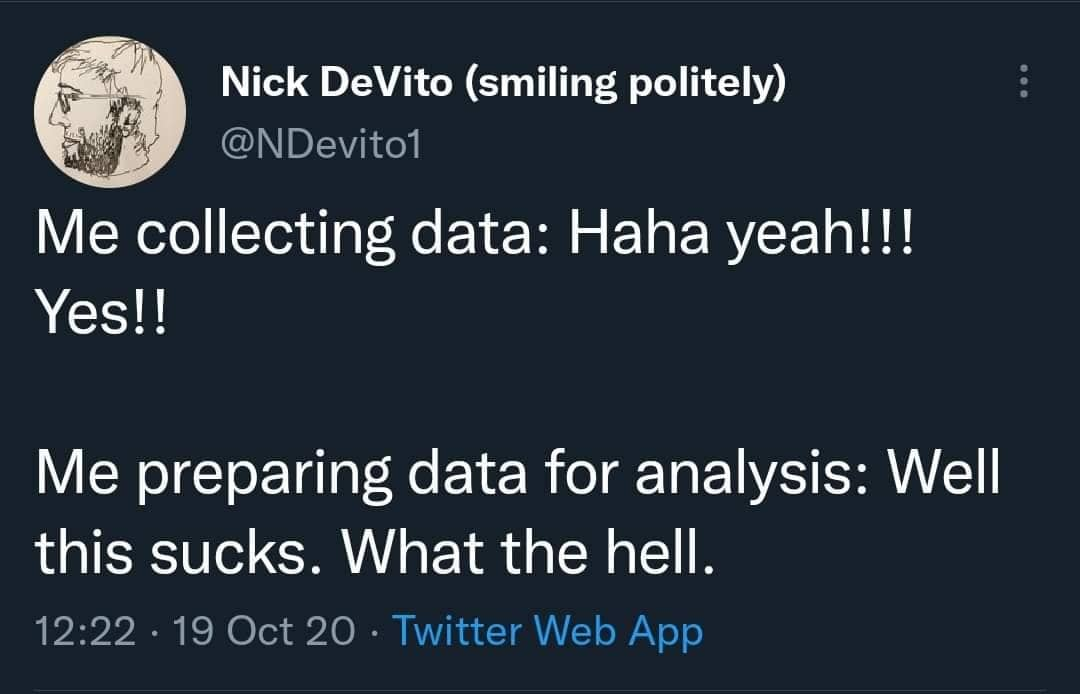
</div>

#### Μη-έγκυρες τιμές

Ας ασχοληθούμε αρχικά με τις μη-έγκυρες τιμές και στη συνέχεια με τις κενές εγγραφές.

Επειδή δεν έχουμε ιδέα τι είδους συμβολοσειρά μπορεί να περιέχει κάθε στήλη, μπορούμε να χρησιμοποιήσουμε τη μέθοδο ``unique`` που μας επιστρέφει μία λίστα με τις μοναδικές τιμές που εμφανίζονται σε κάποια στήλη.

In [42]:
data["longitude"].unique()

array(['-122.23', '-122.22', '-122.24', '-122.25', '-122.26', '-122.27',
       nan, '-122.28', '-122.29', '-122.3', '-122.21', '-122.2',
       '-122.19', '-122.18', '-122.13', '-122.16', '-122.17', '-122.15',
       '-122.14', '-122.12', '-122.33', '-122.34', '-122.06', '-122.07',
       '-122.08', '-122.09', '-122.1', '-122.11', '-122.03', '-121.97',
       '-122.02', '-122.04', '-122.05', '-121.99', '-122.01', '-121.96',
       '-121.98', '-122.0', '-121.93', '-121.94', '-121.95', '-121.92',
       '-121.89', '-121.91', '-121.9', '-121.88', '-121.87', '-121.85',
       '-121.86', '-121.84', '-121.82', '-121.77', '-121.62', '-121.61',
       '-121.72', '-121.75', '-121.8', '-121.76', '-121.78', '-121.79',
       '-121.73', '-119.78', '-119.93', '-120.0', '-120.56', '-120.59',
       '-120.55', '-120.25', '-120.79', '-120.8', '-120.65', '-120.76',
       '-120.88', '-120.69', '-120.93', '-120.97', '-120.87', '-120.98',
       '-120.72', '-120.77', '-120.66', '-120.62', '-120.71', '-1

Βλέπουμε ότι υπάρχει τουλάχιστον μία συμβολοσειρά "empty" που εμποδίζει τη μετατροπή της στήλης σε αριθμητική τιμής.

Χρήσιμο είναι να μπορούμε να δούμε τον συνολικό αριθμό των συγκεκριμένων συμβολοσειρών που υπάρχουν σε κάθε στήλη, ώστε να ξέρουμε πως να προχωρήσουμε.

In [43]:
(data[data.columns] == 'empty').sum()

longitude           1
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       3
population          0
households          2
medianIncome        0
medianHouseValue    0
dtype: int64

Ένας καλός τρόπος να αντιμετωπίσουμε αυτό το πρόβλημα των μη-έγκυρων τιμών είναι να βρούμε την τοποθεσία τους μεσα στο DataFrame και να τις αντικαταστήσουμε με κάποια τιμή. 

Μία εναλλακτική θα ήταν απλά να αφαιρέσουμε τελειώς όποιες σειρές περιέχουν τέτοιες μη-έγκυρες τιμές.

Θα επιλέξουμε να αντικαταστήσουμε τις μη-έγκυρες τιμές με την τιμή ``NaN`` καθώς, όπως θα δούμε σε λίγο, το ``pandas`` μας δίνει αρκετά εργαλεία για να διαχειριστούμε κενές εγγραφές. 

Αφού γίνει η αντικατάσταση, θα επιχειρήσουμε να μετατρέψουμε όλες τις στήλες που περιείχαν τέτοιες μη-έγκυρες τιμές σε στήλες που περιέχουν αριθμητικά δεδομένα. 

In [44]:
import numpy as np


for col in data.columns:
    for row in data[col]:
        if row == 'empty':
            data[col].replace('empty', np.nan, inplace=True)
            
            
    data[col] = data[col].astype(np.float64)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20292 non-null  float64
 1   latitude          20303 non-null  float64
 2   housingMedianAge  20270 non-null  float64
 3   totalRooms        20331 non-null  float64
 4   totalBedrooms     20317 non-null  float64
 5   population        20288 non-null  float64
 6   households        20291 non-null  float64
 7   medianIncome      20300 non-null  float64
 8   medianHouseValue  20267 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Όντως, παρατηρούμε ότι πλέον το DataFrame περιέχει μόνο αριθμητικές τιμές. Εξακολουθεί όμως να έχει κενές εγγραφές. Στη συνέχεια θα δούμε πως να τις αντιμετωπίσουμε.

#### Κενές εγγραφές

Αρχικά, αν θέλουμε στο ``pandas`` να διαπιστώσουμε αν μια τιμή δεν υπάρχει, μπορούμε να χρησιμοποιήσουμε τις μεθόδους ``isna()`` ή ``isnull()`` (είναι ισοδύναμες).

Αντιστρόφως, αν θέλουμε να διαπιστώσουμε ότι μια τιμή υπάρχει, μπορούμε να χρησιμοποιήσουμε τη μέθοδο ``notna()`` ή ``notnull()``.

Αν θέλουμε να μετρήσουμε πόσα κενά υπάρχουν, μπορούμε να αθροίσουμε το αποτέλεσμα της isna(), αφού στο άθροισμα οι τιμές True γίνονται 1 και οι τιμές False γίνονται 0.

In [45]:
data["totalRooms"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

In [46]:
data["totalBedrooms"].isna().sum()

323

In [47]:
data[data.columns].isna().sum()

longitude           348
latitude            337
housingMedianAge    370
totalRooms          309
totalBedrooms       323
population          352
households          349
medianIncome        340
medianHouseValue    373
dtype: int64

Μία επιλογή που έχουμε στη διάθεση μας είναι να διαγράψουμε όλες εκείνες τις γραμμές ή στήλες που περιέχουν κενές εγγραφές χρησιμοποιώντας τη μέθοδο ``dropna()``. Το μειονέκτημα με αυτή τη μέθοδο είναι ότι μπορεί να οδηγήσει σε μεγάλη απώλεια δεδομένων.

Μία εναλλακτική είναι να προσπαθήσουμε να συμπληρώσουμε τα κενά στα δεδομένα μας χρησιμοποιώντας κάποια λογική, σταθερή αριθμητική τιμή (π.χ. μηδέν, μέση τιμή κτλ) ή χρησιμοποιώντας κάποια πιο πολύπλοκη μέθοδο όπως γραμμική παρεμβολή (linear interpolation).

Στο ``pandas`` το "γέμισμα" των κενών εγγραφών γίνεται με τη μέθοδο ``fillna()``.

Το με ποιόν τρόπο μπορούμε να συμπληρώσουμε τα κενά χωρίς να παραποιούμε τα δεδομένα μας είναι ένα δύσκολο κομμάτι που απαιτεί σκέψη και αντίληψη του τι αντιπροσωπεύουν τα δεδομένα.

Θα δούμε πως εφαρμόζονται αυτές οι τεχνικές στο DataFrame που περιέχει τους tutors καθώς είναι ένα μικρότερο σύνολο δεδομένων και στη συνέχεια θα τις εφαρμόσουμε στο αληθινό σύνολο δεδομένω για τις οικίες στην Καλιφόρνια.

In [48]:
df

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,NaN,Biology,NaN,NaN
4,jane.doe@email.com,Jane,Doe,NaN,Chemistry,NaN,NaN


In [49]:
# This will get rid all rows that have NaN valus
df.dropna(axis='index', how='any')

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0


In [50]:
# This will get rid all columns that have NaN valus
df.dropna(axis='columns', how='any')

,email,first_name,last_name,research_field
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,Astrophysics
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,Astrophysics
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,Astrophysics
3,john.doe@email.com,John,Doe,Biology
4,jane.doe@email.com,Jane,Doe,Chemistry


In [51]:
# This will return the original DataFrame since
# no row has all values equal to NaN (same goes for columns)
df.dropna(axis='index', how='all')

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,NaN,Biology,NaN,NaN
4,jane.doe@email.com,Jane,Doe,NaN,Chemistry,NaN,NaN


In [52]:
# Now we will try to fill empty entries using fillna
mean_office_value = df.iloc[:3, 3].mean()

df.fillna(round(mean_office_value, 1))

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,230.7,Biology,230.7,230.7
4,jane.doe@email.com,Jane,Doe,230.7,Chemistry,230.7,230.7


Στο τελευταίο κελί, αντί να διαγράψουμε όλες τις εγγραφές που περιείχαν κενά, τα συμπληρώσαμε χρησιμοποιώντας τη μέση τιμή της στήλης που περιείχε αριθμητικά δεδομένα.

Προφανώς αυτό το αποτέλεσμα δεν βγάζει κανένα νόημα για το εν λόγω σύνολο δεδομένων. Αυτό αποδεικνύει ότι δεν υπάρχει μία συγκεκριμένη λύση που να εφαρμόζεται τυφλά σε όλα τα προβλήματα, αλλά απαιτείται λογική σκέψη και κατανόηση των δεδομένων.

Μία παράμετρος που μας δίνει η ``fillna()`` είναι η μέθοδος με την οποία μπορούμε να γεμίσουμε κάποιο κελί. Δύο χρήσιμες μέθοδοι είναι οι ``ffill`` (forward fill) και η ``bfill`` (backward fill).

Στην πρώτη περίπτωση η κενή εγγραφή γεμίζεται με την τιμή του από πάνω συμπληρωμένου κελιού, ενώ στη δεύτερη γεμίζεται με την τιμή του από κάτω συμπληρωμένου κελιού.

In [53]:
df.fillna(method='ffill')

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,230.0,Biology,8.0,240.0
4,jane.doe@email.com,Jane,Doe,230.0,Chemistry,8.0,240.0


In [54]:
# This won't work since there are
# no entries below to back fill
df.fillna(method='bfill')

,email,first_name,last_name,office,research_field,working hours per day,total working hours per month
0,schanlaridis@physics.uoc.gr,Savvas,Chanlaridis,232.0,Astrophysics,8.0,240.0
1,ekyritsis@physics.uoc.gr,Elias,Kyritsis,230.0,Astrophysics,8.0,240.0
2,nmandarakas@physics.uoc.gr,Nikos,Mandarakas,230.0,Astrophysics,8.0,240.0
3,john.doe@email.com,John,Doe,NaN,Biology,NaN,NaN
4,jane.doe@email.com,Jane,Doe,NaN,Chemistry,NaN,NaN


Ξέροντας πλεον πως να διαχειριστούμε τις κενές εγγραφές, ας επιστρέψουμε στο αληθινό σύνολο δεδομένων.

Θα συμπληρώσουμε τις γραμμές που περιέχουν τιμές NaN, με το μέσο όρο των δύο γειτονικών τους κελιών. Θα συνδυάσουμε δηλαδή τις μεθόδους ffill και bfill.

In [55]:
for col in data.columns:
    data[col].where(data[col] == np.nan, 
                    other=(data[col].fillna(method='ffill') + data[col].fillna(method='bfill'))/2., 
                    inplace=True)  
          

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Παρατηρούμε ότι πλέον όλες οι στήλες του DataFrame είναι συμπληρωμένες με κάποια τιμή και περιέχουν αριθμητικά δεδομένα.

Έχοντας ένα πλήρες σύνολο δεδομένων μπορούμε να χρησιμοποιήσουμε τη μέθοδο ``describe()`` που μας δίνει βασικά στοιχεία περιγραφικής στατιστικής. Μπορούμε έτσι να εντοπισουμε παράξενες τιμές δεδομένων που αλλοιώνουν το σύνολο (π.χ. κάποια αφύσικα χαμηλή τιμή ενός μεγέθους που δεν μπορεί να ανταποκρίνεται στην πραγματικότητα).

In [56]:
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569815,35.631894,28.648643,2633.964462,538.135974,1426.863808,499.462306,3.869965,206828.798837
std,2.003521,2.136044,12.565050,2172.134280,421.226227,1129.701826,381.783459,1.891769,115303.270013
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,296.000000,790.000000,280.000000,2.566100,119800.000000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1168.000000,409.000000,3.535700,179650.000000
75%,-118.010000,37.710000,37.000000,3143.250000,647.000000,1726.000000,603.000000,4.744700,264900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Το στάδιο της προ-επεξεργασίας των δεδομένων έχει τελειώσει. Αυτό είναι και το τελικό DataFrame το οποίο θα χρησιμοποιηθεί στην ανάλυση.

## Παράδειγμα 2: Προεπεξεργασία και Ανάλυση Δεδομένων

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    
Διαβάστε σε ένα ``DataFrame`` τα δεδομένα του αρχείου **employees.csv** . 

### Προεπεξεργασία των δεδομένων
1. Για να έχετε μία πρώτη αίσθηση των δεδομένων σας επιστρέψτε πίσω τις πρώτες 20 σειρές του ``DataFrame`` και επίσης ελέξτε τον τύπο των δεδομένων κάθε στήλης καθώς και άλλες πληροφορίες για το αρχείο σας.

    
2. Ελέξγτε αν κάποια από τις στήλες του ``DataFrame`` περιέχει NaN values.

Όπως είδατε κάποιες στήλες περιέχουν NaN values και για να προχωρήσουμε την ανάλυση μας θα πρέπει να αποφασίσουμε πως θα τις χειριστούμε.

    
3. Στην πρώτη στήλη για την οποία γνωρίζετε ότι περιέχει NaN values, αντικαταστήσετε αυτές τις τιμές με την συμβολοσειρά **"Unknown"**. Στην συνέχεια επιστρέψτε όλες τις σειρές του ``DataFrame`` για τις οποίες αυτή η στήλη έχει πάρει το όρισμα **"Unknown"**. Επιστρέψτε μόνο τις δύο πρώτες στήλες. Χρησιμοποιήστε την μέθοδο ``iloc``.

    
4. Για την δεύτερη στήλη για την οποία γνωρίζετε ότι περιέχει NaN values, συμπληρώστε αυτές τις κενές εγγραφές με την συμβολοσειρά **"No-gender"**.  Στην συνέχεια επιστρέψτε όλες τις σειρές του ``DataFrame`` για τις οποίες αυτή η στήλη έχει πάρει το όρισμα **"No-gender"**. Επιστρέψτε μόνο τις τρεις πρώτες στήλες. Χρησιμοποιήστε την μέθοδο ``loc``.

    
5. Πετάξτε από το ``DataFrame`` όλες τις σειρές για τις οποίες η στήλη **"Senior Management"** περιέχει NaN values.<br>**TIP**: Ελέγξτε την χρήση του ορίσματος subset στην μέθοδο ``dropna`` . Ελέγξτε επίσης το shape του ``DataFrame``. Τι παρατηρείτε;

    
6. Για την τελευταία στήλη για την οποία γνωρίζετε ότι περιεχεί NaN values, συμπληρώστε αυτές τις κενές εγγραφές με την τιμή του από πάνω συμπληρωμένου κελιού ή με την τιμή από κάτω συμπληρωμένου κελιού.

    
7. Τώρα που ολοκληρώσαμε την διαχείριση των missing values του ``DataFrame``, ελέγξτε ξανά εαν το ``DataFrame`` περιέχει κενές εγγραφές. Τι παρατηρείτε; 

    
### Ανάλυση των δεδομένων
1. Χρησιμοποιώντας την στήλη **"Salary"** που μας παρέχει πληροφορία για τον ετήσιο μισθό των εργαζομένων τις εταιρείας, υπολογίστε τον μηνιαίο μισθό των υπαλλήλων και προσθέστε μία έξτρα στήλη με την πληροφορία αυτή. Ονομάστε την στήλη **"Salary per month"** . 

    
2. Υπολογίστε την μέση τιμή του μηνιαίου μισθού που παρέχει η εταιρεία στους υπαλλήλους της, καθώς και την τυπική του απόκλιση. Τυπώστε τις δύο αυτές τιμές, στογγυλοποιώντας τα νούμερα στο 2 δεκαδικό ψηφίο. 

    
3. Δημιουργήστε ένα νέο ``DataFrame`` (με ό,τι όνομα επιθυμείτε), στο οποίο θα εμπεριέχονται μόνο οι γυναίκες εργαζόμενες της εταιρίας που έχουν μηνιαιό μισθό μεταξύ 5000 και 10000. 

    
4. Υπολογίστε τις βασικές στατιστικές πληροφορίες του ``DataFrame``. Τι παρατηρείτε;

In [57]:
# You can try it here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του σταδίου της προεπεξεργασίας</summary></b>
    
```python 
# Read in data
emp_df = pd.read_csv("data/employees.csv")
    
# task 1
emp_df.head(20)
emp_df.info()
# ---
    
# task 2
emp_df.isna().sum()
# ---
    
# task 3
# Fill in missing values in first column
emp_df["First Name"] = emp_df["First Name"].fillna("Unknown")

# Create a mask 
name_mask = (emp_df["First Name"] == "Unknown")
# name_mask
    
# convert Series filter to numpy array (only required if you plan to use iloc)
name_mask = name_mask.to_numpy()
# name_mask

# Display first two columns
# where first name is unknown
emp_df.iloc[name_mask, [0,1]]
# ---
    
# task 4
# Fill in missing values in second column
emp_df["Gender"] = emp_df["Gender"].fillna("No-gender")

# Create a mask
gender_mask = (emp_df["Gender"] == "No-gender")
# gender_mask
    
# Display first 3 columns 
# where gender is not defined
emp_df.loc[gender_mask, ["First Name", "Gender", "Start Date"]]
# ---
    
# task 5
# Check how many missing values are there
print("Sum of NaN values in column:", emp_df["Senior Management"].isna().sum())

# Get rid of all rows that have a missing value in that column
emp_df.dropna(subset=["Senior Management"], inplace=True)

# Check shape of new DataFrame -> 67 rows deleted
emp_df.shape
# ---
    
# task 6
# Forward fill missing values
emp_df["Team"].fillna(method='ffill', inplace=True)

# Check if the column still has NaN values
emp_df["Team"].isna().sum()
# ---
    
# task 7
emp_df.info()
# ---
```
    
</details>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Κάντε κλικ εδώ για την λύση του σταδίου της ανάλυσης</summary></b>
    
```python 
# task 1
salary_per_month = emp_df["Salary"] / 12
emp_df["Salary per month"] = salary_per_month
# emp_df
# ---
    
# task 2
print("Mean salary per month:", round(emp_df["Salary per month"].mean(), 2))
print("Standard Deviation:", round(emp_df["Salary per month"].std(), 2))
emp_df.describe()
# ---
    
# task 3
# Create some masks to filter the data
females_mask = (emp_df["Gender"] == "Female")
salary_mask = (emp_df["Salary per month"] >= 5000) & (emp_df["Salary per month"] <= 10_000)

# Make a new dataframe
fem_emp_df = emp_df[females_mask & salary_mask]
# fem_emp_df
# ---
                                                                                          
# task 4
fem_emp_df.describe()
# ---
```
    
</details>